In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/air-passengers/AirPassengers.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.set_index('Month', inplace=True)

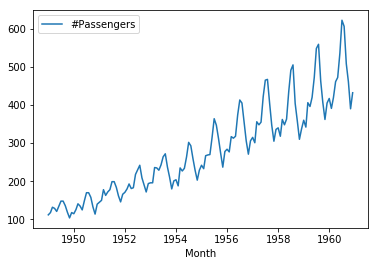

In [7]:
sns.lineplot(legend = 'full' , data=df)

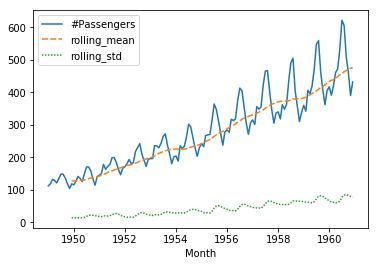

In [8]:
df1=df
df1['rolling_mean'] = df['#Passengers'].rolling(window = 12).mean()
df1['rolling_std'] = df['#Passengers'].rolling(window = 12).std()
sns.lineplot(data=df1, legend='full')

In [9]:
result = adfuller(df['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


[array([1, 2, 2, 1]), array([2, 2, 1, 1]), array([1, 2, 2, 1]), array([1, 1, 2, 2]), array([2, 1, 1, 1]), array([1, 1, 2, 1]), array([1, 1, 1, 1]), array([1, 1, 2, 2]), array([2, 1, 2, 2]), array([1, 2, 1, 1]), array([1, 1, 1, 2]), array([2, 2, 2, 2]), array([2, 1, 2, 1]), array([2, 2, 2, 1]), array([1, 1, 2, 2]), array([1, 1, 2, 2]), array([2, 1, 1, 2]), array([1, 2, 1, 2]), array([2, 1, 2, 2]), array([1, 2, 2, 1]), array([2, 1, 2, 1]), array([2, 1, 1, 1]), array([2, 2, 1, 1]), array([1, 2, 1, 2]), array([1, 1, 2, 1]), array([1, 1, 2, 2]), array([2, 2, 2, 1]), array([2, 1, 2, 1]), array([1, 1, 1, 1]), array([1, 1, 1, 2]), array([1, 2, 1, 1]), array([1, 2, 2, 2]), array([1, 1, 2, 1]), array([1, 2, 1, 2]), array([2, 1, 2, 2]), array([1, 2, 2, 2]), array([1, 1, 2, 1]), array([2, 2, 1, 2]), array([1, 1, 2, 2]), array([2, 2, 2, 2]), array([2, 2, 1, 1]), array([1, 1, 2, 2]), array([1, 1, 1, 1]), array([1, 1, 2, 2]), array([2, 2, 1, 1]), array([2, 1, 2, 1]), array([2, 2, 2, 2]), array([2, 2,

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 2 2 1]: AIC = 1391.9084700696426
	ORDER = [2 2 1 1]: AIC = 1393.8865727203206


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 2 2 1]: AIC = 1391.9084700696426
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621
	ORDER = [2 1 1 1]: AIC = 1378.338319598773


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 1 2 1]: AIC = 1385.4975450289621
	ORDER = [1 1 1 1]: AIC = 1394.6825053250072
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python

	ORDER = [2 1 2 2]: AIC = 1353.3466408631175
	ORDER = [1 2 1 1]: AIC = 1398.9284000666994
	ORDER = [1 1 1 2]: AIC = 1394.6825053250072


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


	ORDER = [2 2 2 2]: AIC = 1392.6568885311585


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 1]: AIC = 1353.3466408631175
	ORDER = [2 2 2 1]: AIC = 1392.6568885311585
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 1 2]: AIC = 1378.338319598773
	ORDER = [1 2 1 2]: AIC = 1398.9284000666994


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 2]: AIC = 1353.3466408631175
	ORDER = [1 2 2 1]: AIC = 1391.9084700696426


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 1]: AIC = 1353.3466408631175
	ORDER = [2 1 1 1]: AIC = 1378.338319598773
	ORDER = [2 2 1 1]: AIC = 1393.8865727203206
	ORDER = [1 2 1 2]: AIC = 1398.9284000666994
	ORDER = [1 1 2 1]: AIC = 1385.4975450289621
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 2 2 1]: AIC = 1392.6568885311585


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 1]: AIC = 1353.3466408631175
	ORDER = [1 1 1 1]: AIC = 1394.6825053250072
	ORDER = [1 1 1 2]: AIC = 1394.6825053250072
	ORDER = [1 2 1 1]: AIC = 1398.9284000666994
	ORDER = [1 2 2 2]: AIC = 1391.9084700696426


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 1 2 1]: AIC = 1385.4975450289621
	ORDER = [1 2 1 2]: AIC = 1398.9284000666994


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 2]: AIC = 1353.3466408631175
	ORDER = [1 2 2 2]: AIC = 1391.9084700696426
	ORDER = [1 1 2 1]: AIC = 1385.4975450289621
	ORDER = [2 2 1 2]: AIC = 1393.8865727203206
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 2 2 2]: AIC = 1392.6568885311585
	ORDER = [2 2 1 1]: AIC = 1393.8865727203206
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 1 1 1]: AIC = 1394.6825053250072
	ORDER = [1 1 2 2]: AIC = 1385.4975450289621
	ORDER = [2 2 1 1]: AIC = 1393.8865727203206


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [2 1 2 1]: AIC = 1353.3466408631175
	ORDER = [2 2 2 2]: AIC = 1392.6568885311585
	ORDER = [2 2 1 2]: AIC = 1393.8865727203206


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


	ORDER = [1 2 1 1]: AIC = 1398.9284000666994
	ORDER = [1 2 1 2]: AIC = 1398.9284000666994


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


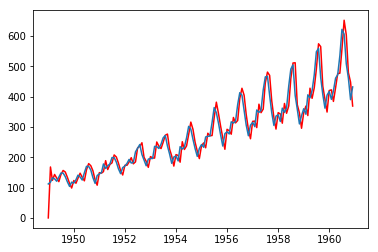

In [10]:
def rand_iterator():
    return np.random.randint(low = 1, high = 3, size = 4)

order_params=[]
results_store=[]

for i in range(50):
    order_params.append(rand_iterator())
    
print(order_params)

#param_grid={'order':order_params}
#model = ARIMA()
#model_fit=GridSearchCV(model,param_grid,n_jobs=-1,cv=3,scoring='neg_mean_absolute_error')
#model_fit.fit(df)

for order_val in order_params:
    model=SARIMAX(df['#Passengers'],order=order_val)
    results= model.fit(disp=0)
    results_store.append(results)
    print('\tORDER = {}: AIC = {}'.format(order_val, results.aic))
    
    
plt.plot(results.fittedvalues, color='red')
plt.plot(df['#Passengers'])

In [11]:
from sklearn.metrics import mean_absolute_error
size = int(len(df) * 0.66)
train, test = df['#Passengers'][0:size], df['#Passengers'][size:len(df)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(1,1,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test, predictions)
print('Test MAPE: %.3f ' % error)
# plot
#plt.plot(test)
#plt.plot(predictions, color='red')

predicted=271.896353, expected=306.000000
predicted=330.485791, expected=315.000000
predicted=308.583504, expected=301.000000
predicted=302.792821, expected=356.000000
predicted=373.950308, expected=348.000000
predicted=323.394872, expected=355.000000
predicted=360.756912, expected=422.000000
predicted=424.030073, expected=465.000000
predicted=450.825155, expected=467.000000
predicted=446.962664, expected=404.000000
predicted=370.352953, expected=347.000000
predicted=344.210242, expected=305.000000
predicted=302.103938, expected=336.000000
predicted=365.912240, expected=340.000000
predicted=332.329364, expected=318.000000
predicted=322.258267, expected=362.000000
predicted=383.067658, expected=348.000000
predicted=327.435519, expected=363.000000
predicted=379.408165, expected=435.000000
predicted=438.619231, expected=491.000000
predicted=482.493841, expected=505.000000
predicted=482.302008, expected=404.000000
predicted=350.354703, expected=359.000000
predicted=381.520310, expected=310

In [12]:
#sns.lineplot(data=test, legend='full')
#sns.lineplot(data=predictions, legend='full', color='red')

In [13]:
size = int(len(df) * 0.66)
df2=df[size:len(df)]
df2.head()

,#Passengers,rolling_mean,rolling_std
Month,,,
1956-12-01,306,328.250000,47.861780
1957-01-01,315,330.833333,46.058921
1957-02-01,301,332.833333,43.983123
1957-03-01,356,336.083333,44.147394
1957-04-01,348,339.000000,43.636932


In [14]:
df2['test']=test
df2['predictions']=predictions

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df2.tail()

,#Passengers,rolling_mean,rolling_std,test,predictions
Month,,,,,
1960-08-01,606,463.333333,83.630500,606,615.854157
1960-09-01,508,467.083333,84.617276,508,560.706990
1960-10-01,461,471.583333,82.541954,461,468.170730
1960-11-01,390,473.916667,79.502382,390,463.952395
1960-12-01,432,476.166667,77.737125,432,372.214173


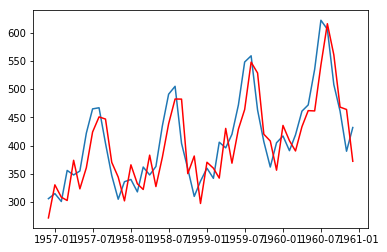

In [16]:
plt.plot(df2['test'])
plt.plot(df2['predictions'], color='red')

In [17]:
forecast=results.forecast(steps=5)

In [18]:
data=pd.concat([df2,forecast])

In [19]:
data=data.drop(['rolling_mean','rolling_std','test'],axis=1)

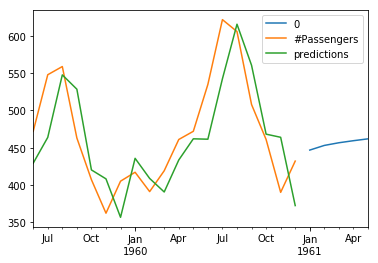

In [20]:
data[30:].plot()